# Keyword Extraction
## 1. Using [TF-IDF](https://towardsdatascience.com/keyword-extraction-python-tf-idf-textrank-topicrank-yake-bert-7405d51cd839)

In [1]:
import string
import nltk

### Download stopwords and punctuation

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/elias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/elias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def get_stopwords(*languages):
    return [sw for lang in languages for sw in nltk.corpus.stopwords.words(lang)]

In [44]:
stop_words = get_stopwords("english", "german") + ["et", "al"]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
def preprocess_text(text, stop_words) -> list[str]:
    # tokenize
    tokens = nltk.tokenize.word_tokenize(text)
    # remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # remove stopwords and make lowercase
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    return tokens

In [6]:
def clean(text, stop_words) -> str:
    return ' '.join(preprocess_text(text, stop_words))

### Read PDF
Adopted from pinecone_test.ipynb

In [7]:
from langchain.document_loaders import PyPDFLoader

In [8]:
def pdf_to_str(pdf_path):
    loader = PyPDFLoader(pdf_path)
    documents = loader.load()
    return ' '.join(doc.page_content for doc in documents)

In [9]:
text = pdf_to_str("test_pdf/3_ProjectManagement.pdf")
print(text[:300])

Software Engineering for AI-
Enabled Systems
Prof. Dr.-Ing. Norbert Siegmund
Software Systems
 Topic I: 
Why Project Management
2 Project Management of AI Systems
TL;DR: 
- Scoping the project
- Setting the g oal of the project, product, or system to be developed
- Roles & team management
- Project 


In [10]:
text_cleaned = preprocess_text(text, stop_words)
text_cleaned[:1000]

['software',
 'engineering',
 'ai-',
 'enabled',
 'systems',
 'prof.',
 'dr.-ing',
 'norbert',
 'siegmund',
 'software',
 'systems',
 'topic',
 'project',
 'management',
 '2',
 'project',
 'management',
 'ai',
 'systems',
 'tl',
 'dr',
 'scoping',
 'project',
 'setting',
 'g',
 'oal',
 'project',
 'product',
 'system',
 'developed',
 'roles',
 'team',
 'management',
 'project',
 'life',
 'cycle',
 '3',
 'ai',
 'componentsoftware',
 'system',
 'specification',
 'architecture',
 'designdevelopmentdebugging',
 'testing',
 'deployment',
 'monitoring',
 'traditional',
 'software',
 'developmentcollection',
 'labelling',
 'preprocessing',
 'versioning',
 'storagemodel',
 'selection',
 'training',
 'hyperparameter',
 'debuggingdata',
 'manage',
 'mentexperi',
 'mentation',
 'roles',
 'tasks',
 'processesarchetypes',
 'life',
 'cycle',
 'metricsfeedback',
 'flywheel',
 'project',
 'management',
 'ai',
 'p',
 'roject',
 'archetypes',
 'ml',
 'model',
 'types',
 'exist',
 'realize',
 'business',

### Perform Keyword Analysis

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
def get_keyword_scores(text, ngram_range=(1, 1)):
    """
    Returns a dict mapping each unique token to its TF-IDF score
    """
    # Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    # Compute TF-IDF scores
    tfidf_matrix = vectorizer.fit_transform([text])
    # Get the feature names (tokens)
    feature_names = vectorizer.get_feature_names_out()
    # Create a dictionary of token to TF-IDF score
    keyword_scores = {}
    for col in tfidf_matrix.nonzero()[1]:
        keyword_scores[feature_names[col]] = tfidf_matrix[0, col]
    return keyword_scores

In [37]:
def get_top_n_keywords(text, stop_words, n=5, ngram_range=(1, 1)):
    kw_scores = get_keyword_scores(clean(text, stop_words), ngram_range=ngram_range)
    return [item[0] for item in sorted(kw_scores.items(), key=lambda item: item[1], reverse=True)][:n]

In [38]:
get_top_n_keywords(text, stop_words)

['data', 'ml', 'model', 'team', 'project']

In [39]:
text2 = pdf_to_str("test_pdf/3_RequirementsEngineering.pdf")

In [40]:
get_top_n_keywords(text2, stop_words)

['data', 'requirements', 'ai', 'model', 'specification']

#### N-Gram based (Bigrams)

In [49]:
get_top_n_keywords(text, stop_words, ngram_range=(2, 2))

['ml projects', 'data science', 'data scientists', 'anti patterns', 'ai ml']

In [50]:
get_top_n_keywords(text2, stop_words, ngram_range=(2, 2))

['requirements specification',
 'non functional',
 'ai component',
 'research attempts',
 'ai system']

In [59]:
def get_search_terms(text, uni=4, bi=4) -> str:
    top_bigrams = get_top_n_keywords(text, n=bi, stop_words=stop_words, ngram_range=(2, 2))
    top_unigrams = [unigram for unigram in get_top_n_keywords(text, n=uni, stop_words=stop_words)
                    if not any(unigram in bigram for bigram in top_bigrams)]
    return ' '.join(top_unigrams + top_bigrams)

In [69]:
get_search_terms(text, uni=4, bi=4)

'model team ml projects data science data scientists anti patterns'

In [64]:
get_search_terms(text2, uni=3, bi=3)

'data requirements specification non functional ai component'

## 2. Using keyBERT

In [72]:
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer

### Load a pre-trained language model

In [73]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

### Create Instance of Model

### Perform keyword extraction

In [74]:
keybert_model = KeyBERT(SentenceTransformer('distilbert-base-nli-mean-tokens'))
keybert_model.extract_keywords("Your input text goes here.")

[('text', 0.8611), ('input', 0.8411), ('goes', 0.7264)]

In [94]:
def get_keywords_keybert(text, stop_words=None, keybert_model=None, top_n=5, keyphrase_ngram_range=(1, 2)):
    """
    Clean text and return keywords using passed keyBert model. If no model is passed, 'distilbert-base-nli-mean-tokens' will be used
    """
    if stop_words is None:
        stop_words = get_stopwords("english", "german")
    if keybert_model is None:
        keybert_model = KeyBERT(SentenceTransformer('distilbert-base-nli-mean-tokens'))
    text_cleaned = clean(text, stop_words)
    return keybert_model.extract_keywords(text_cleaned, top_n=top_n, keyphrase_ngram_range=keyphrase_ngram_range)

In [90]:
[kw[0] for kw in get_keywords_keybert(text)]

['engineerdata scientistsdevops',
 'designdevelopmentdebugging testing',
 'software developmentcollection',
 'engineerml researcher',
 'algorithms traindata']

['engineerdata scientistsdevops',
 'designdevelopmentdebugging testing',
 'software developmentcollection',
 'engineerml researcher',
 'algorithms traindata']

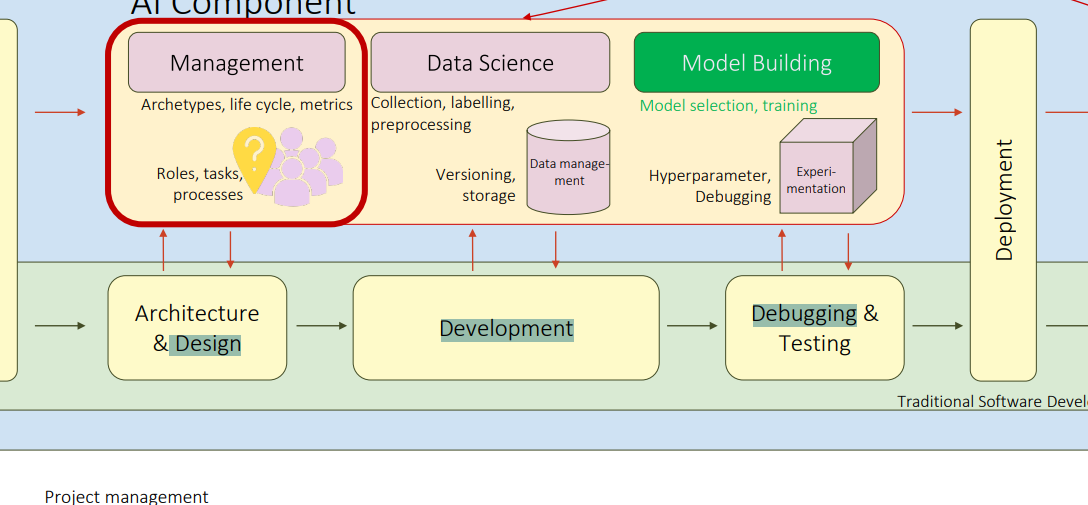

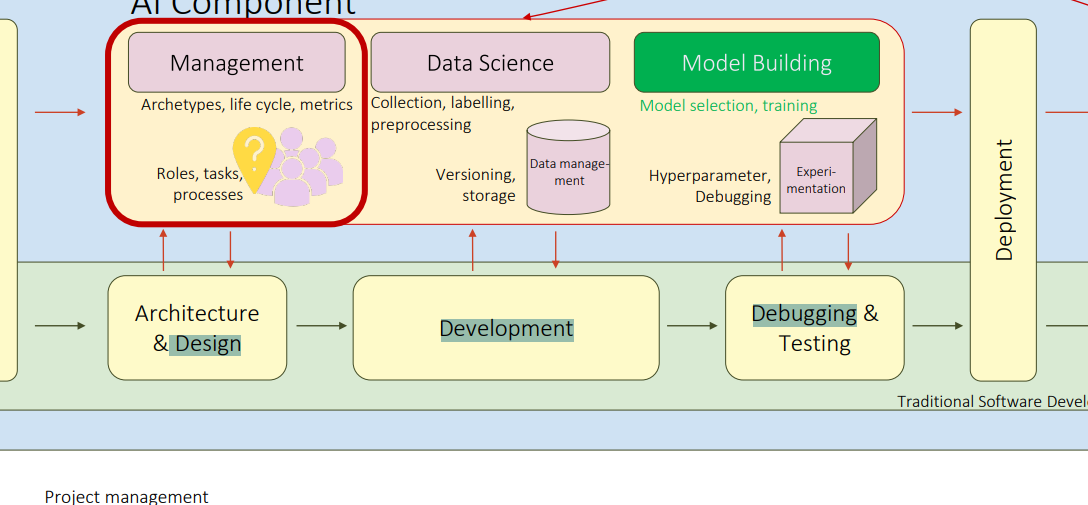

In [46]:
from IPython.display import Image

Image(filename="test_pdf/designdevelopmentdebugging.png")

In [47]:
[kw[0] for kw in get_keywords_keybert(text2)]

['catalog_of_requirements_for_ai_products',
 'designdevelopmentdebugging',
 'processesarchetypes',
 'algorithms',
 'debuggingexperi']

['catalog_of_requirements_for_ai_products',
 'designdevelopmentdebugging',
 'processesarchetypes',
 'algorithms',
 'debuggingexperi']

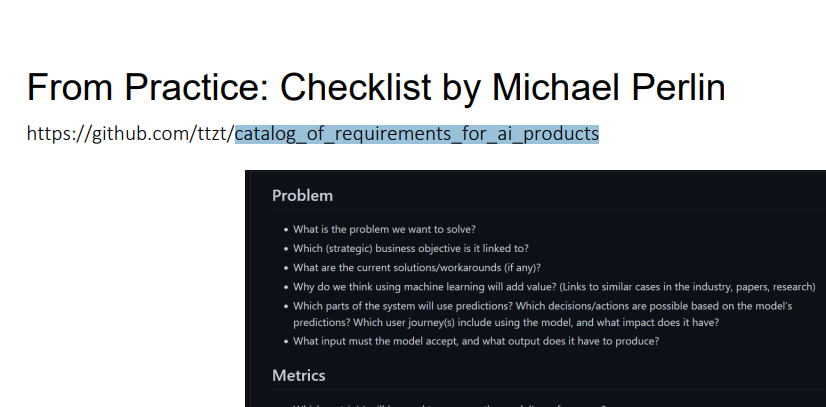

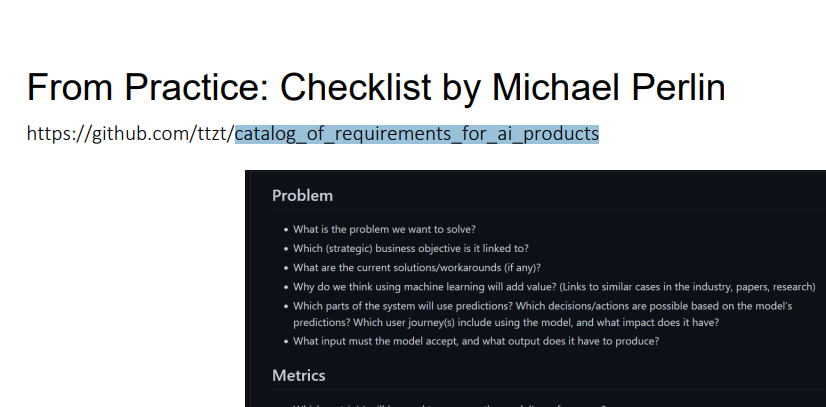

In [48]:
Image(filename="test_pdf/catalog_of_requirements_for_ai_products.png")

In [95]:
text3 = pdf_to_str("test_pdf/socio-technical-anti-patterns-icse2023.pdf")
[kw[0] for kw in get_keywords_keybert(text3)]

['leipzig university',
 'scientists struggle',
 'dresden leipzignorbert',
 'scientists microsoft',
 'scientists software']

['leipzig university',
 'scientists struggle',
 'dresden leipzignorbert',
 'scientists microsoft',
 'scientists software']